# `PySD`

## From documentation

https://pysd.readthedocs.io/en/master/getting_started.html#importing-a-model-and-getting-started

In [30]:
import matplotlib.pyplot as plt
import pysd
from pathlib import Path

In [31]:
p2mdl = Path('../data/teacup.mdl')
model = pysd.read_vensim(p2mdl)
model.doc

,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment
0,Characteristic Time,characteristic_time,None,Minutes,"(0.0, nan)",Constant,Normal,How long will it take the teacup to cool 1/e o...
1,FINAL TIME,final_time,None,Minute,"(nan, nan)",Constant,Normal,The final time for the simulation.
2,Heat Loss to Room,heat_loss_to_room,None,Degrees Fahrenheit/Minute,"(nan, nan)",Auxiliary,Normal,This is the rate at which heat flows from the ...
3,INITIAL TIME,initial_time,None,Minute,"(nan, nan)",Constant,Normal,The initial time for the simulation.
4,Room Temperature,room_temperature,None,Degrees Fahrenheit,"(-459.67, nan)",Constant,Normal,Put in a check to ensure the room temperature ...
5,SAVEPER,saveper,None,Minute,"(0.0, nan)",Auxiliary,Normal,The frequency with which output is stored.
6,TIME STEP,time_step,None,Minute,"(0.0, nan)",Constant,Normal,The time step for the simulation.
7,Teacup Temperature,teacup_temperature,None,Degrees Fahrenheit,"(32.0, 212.0)",Stateful,Integ,The model is only valid for the liquid phase o...
8,Time,time,None,None,"(nan, nan)",None,None,Current time of the model.


In [32]:
stocks = model.run()

stocks

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Characteristic Time,Heat Loss to Room,Room Temperature,Teacup Temperature
time,,,,,,,,
0.000,60,0,0.125,0.125,10,11.000000,70,180.000000
0.125,60,0,0.125,0.125,10,10.862500,70,178.625000
0.250,60,0,0.125,0.125,10,10.726719,70,177.267188
0.375,60,0,0.125,0.125,10,10.592635,70,175.926348
0.500,60,0,0.125,0.125,10,10.460227,70,174.602268
...,...,...,...,...,...,...,...,...
59.500,60,0,0.125,0.125,10,0.027609,70,70.276092
59.625,60,0,0.125,0.125,10,0.027264,70,70.272641
59.750,60,0,0.125,0.125,10,0.026923,70,70.269233


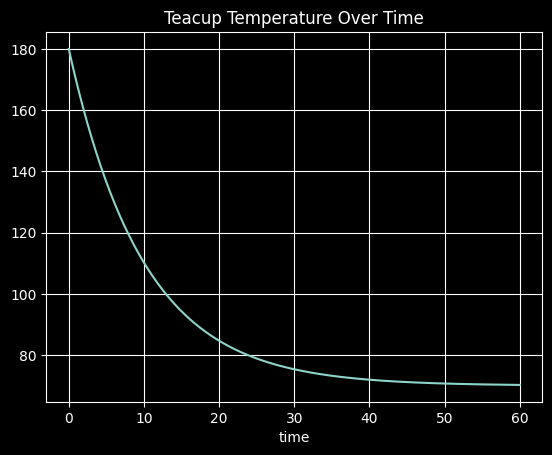

In [33]:
def plot_results(r, title=None):
    r["Teacup Temperature"].plot()
    plt.title(title)
    plt.grid()

plot_results(stocks, title="Teacup Temperature Over Time")

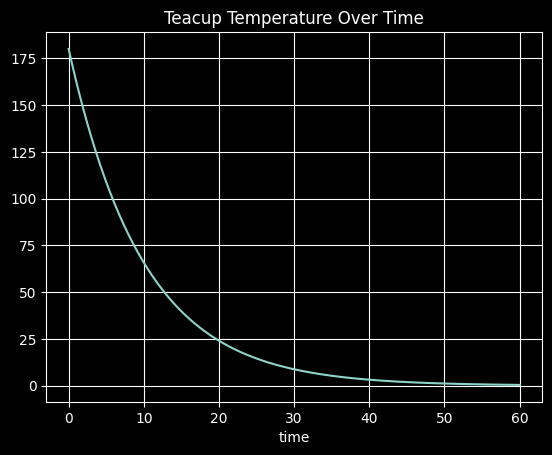

In [34]:
stocks = model.run(params={'Room Temperature': 0})

plot_results(stocks, title="Teacup Temperature Over Time")

In [35]:
from pysd.py_backend.output import ModelOutput

model = pysd.read_vensim(p2mdl)

# instantiate ModelOutput object
output = ModelOutput()

# configure the stepper behavior, passing a list of the variables that
# will be updated before running each model step in the step_vars argument
model.set_stepper(output,
                  step_vars=["room_temperature"],
                  final_time=15)

# run 40 steps increasing the room_temperature by one degree at each step
for _ in range(40):
   model.step(1, {"room_temperature": model["room_temperature"] + 1})

# store model results in a pandas DataFrame (default unless a file name
# is passed when instantiating the ModelOutput object)
result_df = output.collect(model)

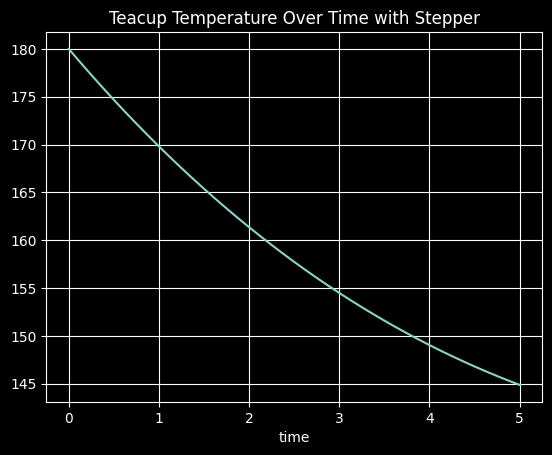

In [36]:
plot_results(result_df, title="Teacup Temperature Over Time with Stepper")

In [37]:
from pysd.py_backend.output import ModelOutput

# Load your model as usual
p2mdl = Path('../data/teacup.mdl')
model = pysd.read_vensim(p2mdl)

# 1. Create a ModelOutput object to collect results
output = ModelOutput()

# 2. Configure the model for stepwise execution
#    step_vars is a list of variables you might want to update before each step (can be empty)
model.set_stepper(output, step_vars=[], final_time=10)  # set final_time as desired

In [38]:
# 3. Run the simulation step by step
for _ in range(10):  # Do 10 steps
    # Optionally, you can update variables by passing a dict as second arg, e.g. {"room_temperature": 75}
    model.step(1)

# 4. Collect results as a DataFrame
results = output.collect(model)
display(results)

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Characteristic Time,Heat Loss to Room,Room Temperature,Teacup Temperature
time,,,,,,,,
0.000,10,0,0.125,0.125,10,11.000000,70,180.000000
0.125,10,0,0.125,0.125,10,10.862500,70,178.625000
0.250,10,0,0.125,0.125,10,10.726719,70,177.267188
0.375,10,0,0.125,0.125,10,10.592635,70,175.926348
0.500,10,0,0.125,0.125,10,10.460227,70,174.602268
0.625,10,0,0.125,0.125,10,10.329474,70,173.294740
0.750,10,0,0.125,0.125,10,10.200356,70,172.003556
0.875,10,0,0.125,0.125,10,10.072851,70,170.728511
1.000,10,0,0.125,0.125,10,9.946940,70,169.469405


In [39]:
from pysd.py_backend.output import ModelOutput
from pathlib import Path
import pysd

In [ ]:
# Load your model
p2mdl = Path('../data/teacup.mdl')
model = pysd.read_vensim(p2mdl)

In [41]:
model = pysd.load(p2mdl.with_suffix('.py'))
# Set up output and stepper (adjust final_time as needed)
output = ModelOutput()
model.set_stepper(output, final_time=60)  # Make sure final_time is large enough for all steps

# Run the first 4 steps
model.step(4)
model.export(p2mdl.with_suffix('.pic'))
results_1 = output.collect(model)
print("After 4 steps:")
display(results_1)

After 4 steps:


/home/vtec/miniconda3/envs/crmsim/lib/python3.10/site-packages/pysd/py_backend/model.py:2379: UserWarning: 
Compatibility of exported states could be broken between different versions of PySD or xarray, current versions:
	PySD 3.14.3
	xarray 2025.4.0

  warnings.warn(


,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Characteristic Time,Heat Loss to Room,Room Temperature,Teacup Temperature
time,,,,,,,,
0.000,60,0,0.125,0.125,10,11.000000,70,180.000000
0.125,60,0,0.125,0.125,10,10.862500,70,178.625000
0.250,60,0,0.125,0.125,10,10.726719,70,177.267188
0.375,60,0,0.125,0.125,10,10.592635,70,175.926348
0.500,60,0,0.125,0.125,10,10.460227,70,174.602268


In [42]:
# Load the compiled Python model file (not the .mdl)
model = pysd.load(p2mdl.with_suffix('.py'))

output = ModelOutput()
model.set_stepper(
    output,
    initial_condition=p2mdl.with_suffix('.pic'),  # Load initial conditions from a .pic file
    final_time=60  # your new end time
)

# Run the first 4 steps
model.step(4)
results_2 = output.collect(model)
model.export(p2mdl.with_suffix('.pic'))
print("After 4 steps:")
display(results_2)

After 4 steps:


/home/vtec/miniconda3/envs/crmsim/lib/python3.10/site-packages/pysd/py_backend/model.py:2379: UserWarning: 
Compatibility of exported states could be broken between different versions of PySD or xarray, current versions:
	PySD 3.14.3
	xarray 2025.4.0

  warnings.warn(


,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Characteristic Time,Heat Loss to Room,Room Temperature,Teacup Temperature
time,,,,,,,,
0.500,60,0.5,0.125,0.125,10,10.460227,70,174.602268
0.625,60,0.5,0.125,0.125,10,10.329474,70,173.294740
0.750,60,0.5,0.125,0.125,10,10.200356,70,172.003556
0.875,60,0.5,0.125,0.125,10,10.072851,70,170.728511
1.000,60,0.5,0.125,0.125,10,9.946940,70,169.469405


In [43]:
# Load the compiled Python model file (not the .mdl)
model = pysd.load(p2mdl.with_suffix('.py'))

output = ModelOutput()
model.set_stepper(
    output,
    initial_condition=p2mdl.with_suffix('.pic'),  # Load initial conditions from a .pic file
    final_time=60  # your new end time
)

# Run the first 4 steps
model.step(4)
model.export(p2mdl.with_suffix('.pic'))
results_3 = output.collect(model)
print("After 4 steps:")
display(results_3)

After 4 steps:


/home/vtec/miniconda3/envs/crmsim/lib/python3.10/site-packages/pysd/py_backend/model.py:2379: UserWarning: 
Compatibility of exported states could be broken between different versions of PySD or xarray, current versions:
	PySD 3.14.3
	xarray 2025.4.0

  warnings.warn(


,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Characteristic Time,Heat Loss to Room,Room Temperature,Teacup Temperature
time,,,,,,,,
1.000,60,1.0,0.125,0.125,10,9.946940,70,169.469405
1.125,60,1.0,0.125,0.125,10,9.822604,70,168.226037
1.250,60,1.0,0.125,0.125,10,9.699821,70,166.998212
1.375,60,1.0,0.125,0.125,10,9.578573,70,165.785734
1.500,60,1.0,0.125,0.125,10,9.458841,70,164.588413
